In [48]:
# using SVM till now 

import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [49]:
DIR=r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images'

In [50]:
train=pd.read_csv(r"/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/train.csv")
test=pd.read_csv(r"/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/test.csv")


In [51]:
train.head

<bound method NDFrame.head of         image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]>

In [52]:
test.head

<bound method NDFrame.head of        image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]>

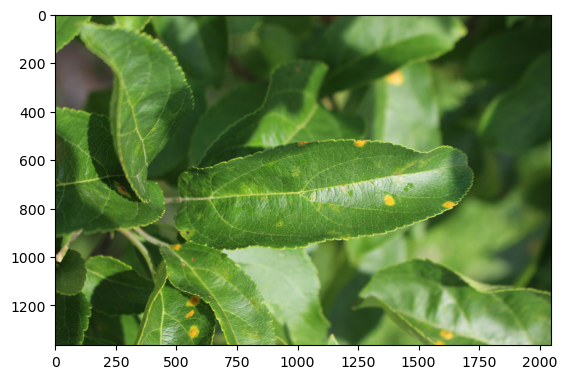

In [53]:
image1=Image.open(r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/Test_0.jpg')
plt.imshow(image1)
plt.show()

In [54]:


# preparing the training data


In [55]:
class_names=train.loc[:,'healthy':].columns
print(class_names)


Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [56]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [57]:
train.head

<bound method NDFrame.head of         image_id  healthy  multiple_diseases  rust  scab  label
0        Train_0        0                  0     0     1      3
1        Train_1        0                  1     0     0      1
2        Train_2        1                  0     0     0      0
3        Train_3        0                  0     1     0      2
4        Train_4        1                  0     0     0      0
...          ...      ...                ...   ...   ...    ...
1816  Train_1816        0                  0     0     1      3
1817  Train_1817        1                  0     0     0      0
1818  Train_1818        1                  0     0     0      0
1819  Train_1819        0                  0     1     0      2
1820  Train_1820        0                  0     0     1      3

[1821 rows x 6 columns]>

In [58]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [59]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/scab')
                
        elif search("Test",img):
            shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/test')

In [60]:
try:
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/healthy')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/multiple_disease')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/rust')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train/scab')

    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/test')
    print("Dir made successfully")
    raise FileExistsError("Error message")

except FileExistsError:
    print ("The data is already prepared")

Dir made successfully
The data is already prepared


In [61]:
train_dir=create_train_data()

100%|██████████| 3644/3644 [00:03<00:00, 1029.84it/s]


In [62]:


# Data Preprocessing


In [63]:
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

Train_DIR=r'/Users/menna/Documents/College/G3-S1/ML Project/SVM/plant-pathology/images/train'
Categories=['healthy','multiple_disease','rust','scab']

flat_data_arr=[] #input array
target_arr=[] #output array

for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(Train_DIR,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : healthy
loaded category:healthy successfully
loading... category : multiple_disease
loaded category:multiple_disease successfully
loading... category : rust
loaded category:rust successfully
loading... category : scab
loaded category:scab successfully


In [64]:


# Model Prepration


In [65]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

svc=svm.SVC(probability=True)

model=GridSearchCV(svc,param_grid)

In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

print('Splitted Successfully')

model.fit(x_train,y_train)

print('The Model is trained well with the given images')

# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [84]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[3 2 3 3 2 2 0 2 2 2 0 3 2 0 0 2 2 2 3 3 3 0 2 0 3 2 3 2 0 2 2 2 3 0 2 0 0
 2 3 2 3 0 0 0 2 0 0 2 2 0 2 2 3 2 2 2 2 3 2 2 0 2 0 3 2 2 0 2 2 2 2 2 2 0
 2 3 3 0 2 3 3 3 3 3 2 3 0 0 2 2 2 1 3 2 2 2 2 2 3 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 3 2 2 0 0 2 3 3 2 3 2 3 0 3 2 2 0 2 0 3 2 2 2 3 2 2 2 2 2 3 0 2
 2 2 2 3 2 2 2 2 3 3 0 2 2 0 2 3 2 0 2 3 2 2 2 2 0 2 2 3 2 2 2 3 3 0 2 0 3
 3 0 0 3 3 3 0 0 3 0 2 3 0 3 2 0 2 0 2 2 0 2 3 0 2 2 2 2 0 2 2 0 3 2 3 2 0
 3 0 2 2 0 2 0 3 2 0 2 2 2 0 3 3 3 2 3 2 3 2 3 0 3 2 0 2 0 2 2 3 2 2 3 0 0
 2 3 0 3 3 2 2 3 2 3 2 0 2 2 2 0 0 3 3 2 2 0 3 0 0 3 2 2 2 3 2 2 3 2 2 0 2
 3 2 0 2 2 0 3 2 2 2 2 2 3 2 2 2 3 3 3 2 0 2 2 3 3 3 0 3 2 3 3 2 3 2 0 0 0
 2 2 3 0 2 3 2 0 3 3 0 2 2 3 2 2 2 2 3 3 2 0 2 0 3 2 2 3 2 0 0 2]
The actual data is:
[3 2 2 0 2 2 3 2 2 2 3 2 2 2 0 2 3 0 0 0 3 2 2 0 3 3 3 3 0 0 2 2 3 2 3 0 2
 2 3 2 1 2 2 2 3 0 3 2 3 0 3 3 3 3 2 3 1 2 2 2 2 3 0 2 1 3 2 2 2 3 2 2 3 2
 2 3 2 3 3 1 3 0 0 2 3 3 3 2 2 3 2 3 3 3 2 3 2 2 2 2 0 2 0 2 0 3 

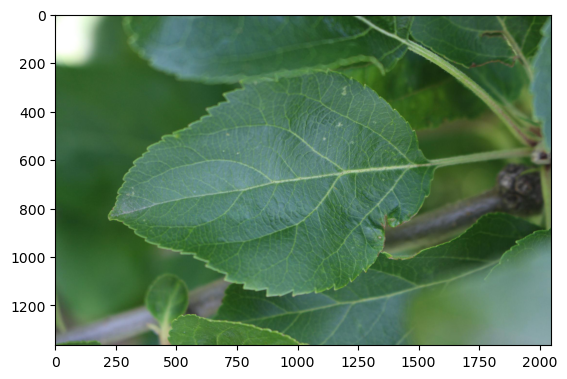

healthy = 88.29858135573164%
multiple_disease = 2.4650235740976183%
rust = 5.171142872503271%
scab = 4.0652521976674665%
The predicted image is : healthy


In [83]:
path='/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/train/Train_389.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])